In [501]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(12,12))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<Figure size 864x864 with 0 Axes>

In [381]:
#highest_zip = ['94103','94040','94107','94301','94105','94109','94115','94086','94121','94110']

In [382]:
train_idx = ['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12','2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

test_idx=['2021-01', '2021-02', '2021-03', '2021-04', '2021-05','2021-06']

In [542]:
#var
var_actual=pd.read_csv('var_actual.csv')
var_pred=pd.read_csv('var_pred.csv')

#sarimax
mse_r2_df=pd.read_csv('mse_r2_df.csv')

#sarimax
full_y_act=pd.read_csv('full_y_act.csv')
full_y_act.set_index('Yr_Mo',inplace=True)
y_pred=pd.read_csv('y_pred.csv')
y_pred.set_index('Unnamed: 0',inplace=True)
y_pred.index.name='Yr_Mo'
#sarima
mse_r2_df2=pd.read_csv('mse_r2_df2.csv')

# sarima 
y_pred2=pd.read_csv('y_pred2.csv')
y_act2=pd.read_csv('y_act2.csv')

In [544]:
#var
var_actual=pd.read_csv('var_actual.csv')
var_pred=pd.read_csv('var_pred.csv')


var_actual.index=var_actual['Yr_Mo']
var_pred.index=var_pred['Unnamed: 0']
var_pred=var_pred.rename_axis("Yr_Mo")
# var_act_zip = var_actual[highest_zip]
# var_pred_zip = var_pred[highest_zip]

var_pred.index#[0:6]

var_pred.index=var_actual.index[-6:]

var_pred.drop('Unnamed: 0',axis=1,inplace=True)
var_actual.drop('Yr_Mo',axis=1,inplace=True)



var_act_zip=var_actual[['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']]
var_pred_zip=var_pred[['Pred77550', 'Pred10458', 'Pred98270', 'Pred55117', 'Pred60074','Pred90272', 'Pred10069', 'Pred10280', 'Pred90265', 'Pred94121']]
#['Pred77550', 'Pred10458', 'Pred98270', 'Pred55117', 'Pred60074','Pred90272', 'Pred10069', 'Pred10280', 'Pred90265', 'Pred94121']
var_pred_zip

,Pred77550,Pred10458,Pred98270,Pred55117,Pred60074,Pred90272,Pred10069,Pred10280,Pred90265,Pred94121
Yr_Mo,,,,,,,,,,
2021-01,1090.086649,1829.177401,2316.783023,1305.562909,1320.069439,6158.541932,3645.712262,3365.413747,13228.347584,3142.395557
2021-02,1095.457918,1837.143438,2336.760945,1311.178618,1324.381520,6185.170812,3613.204588,3347.678148,13413.058940,3116.581309
2021-03,1100.891823,1845.178753,2356.689930,1317.083407,1328.613718,6212.958163,3580.593225,3331.411519,13597.790445,3091.595772
2021-04,1107.015812,1853.299153,2376.686763,1323.115572,1332.956122,6241.847498,3544.533826,3315.813465,13779.065409,3067.333297
2021-05,1113.659014,1861.171794,2397.011669,1329.341250,1337.533170,6270.931930,3503.871020,3299.139693,13961.384125,3041.576592
2021-06,1120.298749,1869.376788,2417.342814,1335.572554,1342.170261,6300.416322,3465.943160,3283.808060,14144.726560,3016.372985


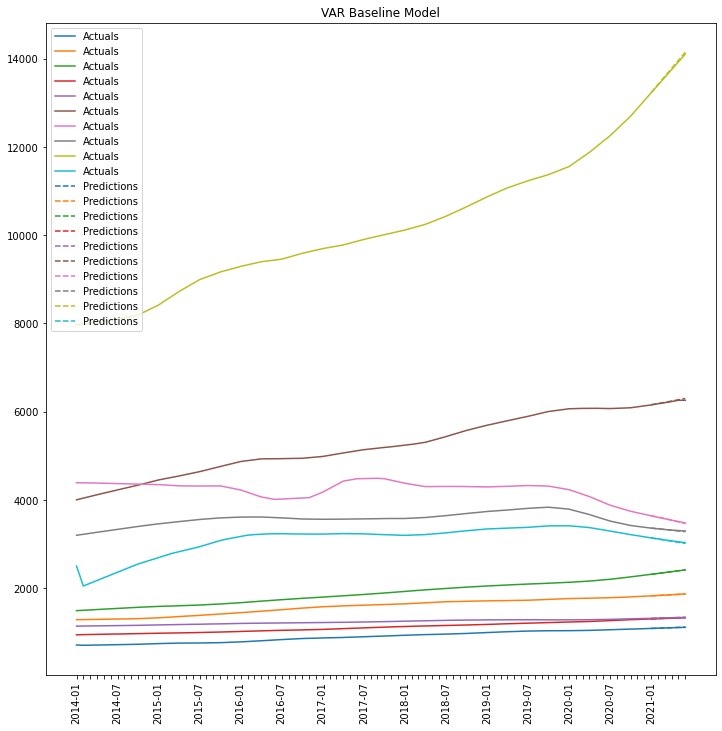

In [545]:
plt.plot(var_act_zip,label="Actuals")
plt.plot(var_pred_zip,linestyle="--",label="Predictions")

plt.gcf().set_size_inches(12, 12)
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title("VAR Baseline Model")
plt.show()

In [547]:
mse_r2_var=pd.DataFrame(columns=['zip','mse','r2'])


var_act_zip[-6:].columns
var_pred_zip[-6:].columns

var_actual=pd.read_csv('var_actual.csv')
var_pred=pd.read_csv('var_pred.csv')


var_actual.index=var_actual['Yr_Mo']
var_actual.drop('Yr_Mo',axis=1,inplace=True)

#var_pred.index=var_actual[-18:].index
var_pred=var_pred.rename_axis("Yr_Mo")
var_pred.drop('Unnamed: 0',axis=1,inplace=True)

for zip_ in var_actual[-6:].columns:
    mse_r2_var=mse_r2_var.append({'zip':zip_,'mse':mean_squared_error(var_actual[-6:][zip_],var_pred[-6:]['Pred'+zip_]),\
                      'r2':r2_score(var_actual[-6:][zip_],var_pred[-6:]['Pred'+zip_])},ignore_index=True)
mse_r2_var
kfdsf=pd.DataFrame(mse_r2_var.mean(),columns=['Mean'])
kfdsf.drop('zip',axis=0,inplace=True)
kfdsf

mse_r2_var.sort_values('r2',ascending=False,inplace=True)

mse_r2_var['rmse']=np.sqrt(mse_r2_var['mse'])
mse_r2_var['rmse']

mse_r2_var.sort_values(['rmse'],ascending=False,inplace=True)
mse_r2_var
mse_r2_var.to_csv('mse_r2_var.csv')

mse_r2_var['rmse']=np.sqrt(mse_r2_var['mse'])
mse_r2_var.sort_values('rmse',ascending=True)

var_zips=['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']

mse_r2_var[mse_r2_var['zip'].isin(var_zips)]

mse_r2_var.sort_values('rmse',inplace=True)
mse_r2_var.drop('r2',axis=1,inplace=True)
mse_r2_var.index.name='VAR'
mse_r2_var

,zip,mse,rmse
VAR,,,
1025,75146,0.020392,0.142799
1264,85224,0.040590,0.201469
445,29456,0.040746,0.201856
206,20010,0.045236,0.212688
330,23221,0.045511,0.213332
...,...,...,...
1283,85303,300.676675,17.340031
1565,92883,306.489846,17.506851
1384,90272,330.225535,18.172109


In [548]:
df1000=mse_r2_var[mse_r2_var['zip'].isin(var_zips)]
df1000.index.name="VAR"
df1000

,zip,mse,rmse
VAR,,,
903,60074,0.325883,0.570862
1726,98270,0.733398,0.856386
869,55117,1.617384,1.271764
121,10458,2.025595,1.423234
1098,77550,6.219789,2.493951
120,10280,44.294382,6.655402
117,10069,57.949753,7.612474
1588,94121,91.757874,9.579033
1384,90272,330.225535,18.172109


In [549]:
df11 = pd.DataFrame(mse_r2_var.mean(),columns=['Mean']).drop(['zip'],axis=0)
df11.index.name='VAR'
df11

,Mean
VAR,
mse,13.762440
rmse,2.775777


In [479]:
#sarima
mse_r2_df2=pd.read_csv('mse_r2_df2.csv')

# sarima 
y_pred2=pd.read_csv('y_pred2.csv')
y_pred2.index
y_pred2.drop('Unnamed: 0',axis=1,inplace=True)
y_act2=pd.read_csv('y_act2.csv')



y_act2.index=['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06','2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12','2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06','2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12','2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06','2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12','2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06','2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12','2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06','2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12','2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06','2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12','2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06','2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12','2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06']
y_act2.index.name='Yr_Mo'

y_pred2.index=y_act2.index[-6:]
#y_act_zip=y_act2[['11937','90265','94920','33480','91320','94105','10007','10069','94107','94103']]

#y_pred_zip=y_pred2[['11937','90265','94920','33480','91320','94105','10007','10069','94107','94103']]
y_act2.drop('Yr_Mo',axis=1,inplace=True)
y_act2

,01604,01702,01752,01851,01852,02109,02111,02113,02114,02115,...,98402,98403,98405,98406,98422,98466,98498,98661,98683,99207
Yr_Mo,,,,,,,,,,,,,,,,,,,,,
2014-01,1030.0,1644.0,1335.0,988.666667,1232.0,2780.75,3560.0,2201.0,2515.0,2473.0,...,997.0,868.0,972.0,1014.5,1219.5,1059.0,934.0,910.0,974.0,956.0
2014-02,1034.0,1639.0,1339.0,976.000000,1233.5,2778.00,3561.0,2208.0,2512.0,2476.0,...,1002.0,872.0,979.0,1016.0,1218.0,1061.0,938.0,918.0,982.5,958.0
2014-03,1039.0,1634.0,1343.0,986.000000,1235.0,2785.00,3561.5,2215.0,2510.0,2478.0,...,1007.0,875.0,985.0,1013.0,1222.0,1063.0,942.0,926.0,991.0,961.0
2014-04,1043.0,1629.0,1347.0,996.000000,1236.0,2792.00,3562.0,2222.0,2508.0,2481.0,...,1012.0,878.0,991.0,1010.5,1225.0,1065.0,946.0,934.0,1000.0,964.0
2014-05,1048.0,1625.0,1351.0,1005.000000,1238.0,2799.00,3563.0,2228.0,2506.0,2485.0,...,1017.0,881.0,997.0,1008.0,1228.5,1067.0,950.0,943.0,1008.0,966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02,1564.0,2045.0,1862.0,1552.000000,1699.0,2825.00,3357.0,2290.0,2584.0,2684.0,...,1545.0,1446.0,1594.0,1702.0,1772.0,1738.0,1539.0,1441.0,1505.0,1396.0
2021-03,1577.0,2047.0,1874.0,1558.000000,1705.0,2813.00,3332.0,2279.0,2576.0,2680.0,...,1557.0,1452.0,1607.0,1719.0,1779.0,1758.0,1555.0,1451.0,1517.0,1403.0
2021-04,1590.0,2050.0,1887.0,1563.000000,1710.0,2802.00,3307.0,2269.0,2569.0,2676.0,...,1569.0,1459.0,1620.0,1736.0,1787.0,1779.0,1571.0,1461.0,1528.0,1410.0


In [480]:

#y_pred_zip
#y_act2.drop('Yr_Mo',axis=1,inplace=True)
y_act2

# y_act2[['94301','94105','94107','94040','94103','08753','33140','02840','91708','90276']]
# y_pred2[['94301','94105','94107','94040','94103','08753','33140','02840','91708','90276']]

#'23223'
y_act2[[ '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']]

,10458,98270,55117,60074,90272,10069,10280,90265,94121
Yr_Mo,,,,,,,,,
2014-01,1289.0,1493.0,947.0,1143.0,4005.0,4392.0,3201.0,7969.0,2504.250000
2014-02,1291.0,1502.0,950.0,1145.0,4043.0,4389.0,3223.0,7986.0,2052.000000
2014-03,1293.0,1510.0,953.0,1147.0,4081.0,4387.0,3246.0,8004.0,2114.428571
2014-04,1295.0,1519.0,956.0,1149.0,4119.0,4384.0,3269.0,8022.0,2176.857143
2014-05,1298.0,1527.0,959.0,1151.0,4156.0,4380.0,3291.0,8048.0,2239.285714
...,...,...,...,...,...,...,...,...,...
2021-02,1837.0,2336.0,1311.0,1324.0,6180.0,3609.0,3348.0,13398.0,3120.000000
2021-03,1845.0,2356.0,1317.0,1329.0,6205.0,3576.0,3333.0,13574.0,3097.000000
2021-04,1854.0,2376.0,1322.0,1333.0,6231.0,3543.0,3318.0,13749.0,3074.000000


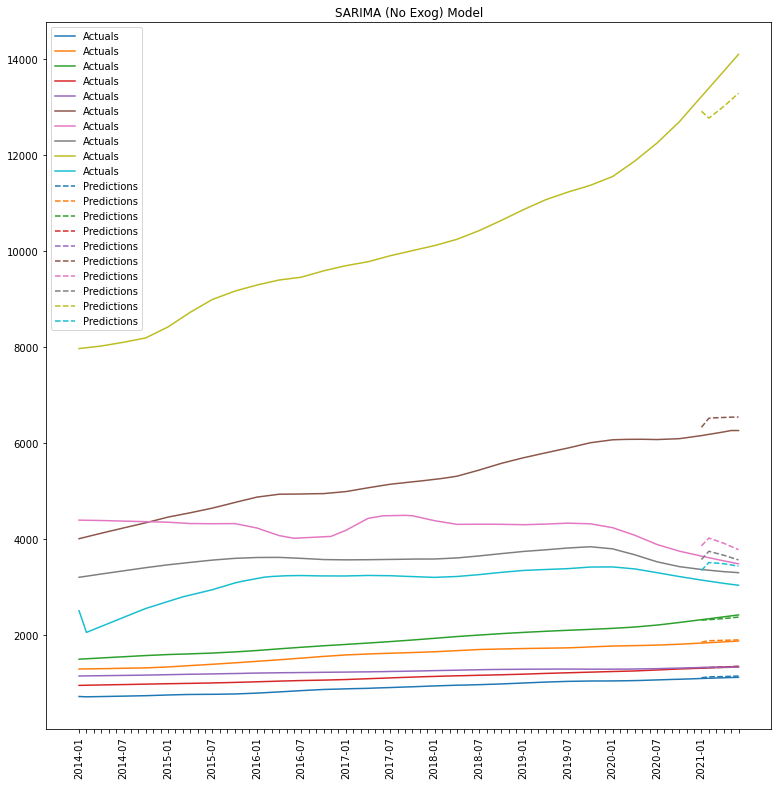

<Figure size 432x288 with 0 Axes>

In [541]:
plt.plot(y_act2[['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']],label="Actuals")
plt.plot(y_pred2[['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']],linestyle="--",label="Predictions")

plt.gcf().set_size_inches(13, 13)
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title("SARIMA (No Exog) Model")
plt.show()
plt.savefig('sarima_graph.jpg')

In [539]:
mse_r2_sarima=pd.DataFrame(columns=['zip','mse','r2'])

y_pred2
y_act2

y_act2[-6:].columns
y_pred2#.set_index('Unnamed: 0')

for zip_ in y_act2[-6:].columns:
    mse_r2_sarima=mse_r2_sarima.append({'zip':zip_,'mse':mean_squared_error(y_act2[-6:][zip_],y_pred2[zip_]),\
                      'r2':r2_score(y_act2[-6:][zip_],y_pred2[zip_])},ignore_index=True)
ttl_sarima = pd.DataFrame(mse_r2_sarima.mean(),columns=['Mean'])
ttl_sarima.drop('zip',axis=0,inplace=True)

mse_r2_sarima['rmse']=np.sqrt(mse_r2_sarima['mse'])


pd.DataFrame(mse_r2_sarima.mean(axis=0).drop(['zip','r2'],axis=0),columns=["Mean"])

mse_r2_sarima.index.name="SARIMA"
mse_r2_sarima.drop('r2',axis=1,inplace=True)
mse_r2_sarima.sort_values('rmse')

,zip,mse,rmse
SARIMA,,,
1039,78724,0.264884,0.514669
774,53212,2.289775,1.513200
80,08807,2.408266,1.551859
1205,85712,2.737893,1.654658
784,55119,2.923646,1.709867
...,...,...,...
1472,94040,221488.341484,470.625479
1478,94107,234388.115071,484.136463
1477,94105,285397.359341,534.225944


In [540]:
mse_r2_sarima[mse_r2_sarima['zip'].isin(var_zips)].sort_values('rmse')

,zip,mse,rmse
SARIMA,,,
783,55117,78.639641,8.867899
817,60074,106.101509,10.300559
995,77550,626.090108,25.021793
120,10458,1008.285191,31.753507
1623,98270,1047.994701,32.372746
1281,90272,82377.346462,287.014541
119,10280,102643.536976,320.380301
116,10069,116329.310661,341.070829
1485,94121,140261.674216,374.515252


In [537]:
df00= pd.DataFrame(mse_r2_sarima.mean(),columns=['Mean']).drop(['zip'],axis=0)
df00.index.name='SARIMA'
df00

,Mean
SARIMA,
mse,10069.026069
rmse,66.655876


In [494]:
#sarimax
mse_r2_df=pd.read_csv('mse_r2_df.csv')

#sarimax
full_y_act=pd.read_csv('full_y_act.csv')
y_pred=pd.read_csv('y_pred.csv')
full_y_act.set_index('Yr_Mo',inplace=True)

In [485]:
full_y_act
#.set_index('Unnamed: 0',inplace=True)
y_pred.index.name='Yr_Mo'
y_act=full_y_act[-6:]

sarimax_pa_df=pd.merge(pd.Series(y_pred.sum(axis=0),name="Pred"),pd.Series(y_act.sum(axis=0),name="Act"),left_index=True,right_index=True)
sarimax_pa_df['Diff']=sarimax_pa_df['Pred']-sarimax_pa_df['Act']
sarimax_pa_df.sort_values('Diff',ascending=False,inplace=True)
sarimax_pa_df['Abs']=np.abs(sarimax_pa_df['Diff'])

sarimax_pa_df['%']=np.abs(sarimax_pa_df['Pred']/sarimax_pa_df['Act']-1)
sarimax_pa_df['%'].astype(float).nlargest(10)

sarimax_pa_df['nkjn']=sarimax_pa_df['Diff']/sarimax_pa_df['Act']
sarimax_pa_df

,Pred,Act,Diff,Abs,%,nkjn
94301,29646.1,26016.0,3630.12,3630.12,0.139534,0.139534
94105,25156,22084.0,3072.04,3072.04,0.139107,0.139107
94107,21938.1,19129.0,2809.09,2809.09,0.14685,0.14685
94040,20918.8,18132.0,2786.81,2786.81,0.153696,0.153696
94103,18894.9,16355.0,2539.93,2539.93,0.1553,0.1553
...,...,...,...,...,...,...
08753,10766.1,12173.0,-1406.87,1406.87,0.115573,-0.115573
33140,15539.4,17103.0,-1563.64,1563.64,0.091425,-0.091425
02840,14656.5,16497.0,-1840.45,1840.45,0.111563,-0.111563
91708,15438.6,17340.0,-1901.39,1901.39,0.109653,-0.109653


In [495]:
y_pred.set_index('Unnamed: 0',inplace=True)
y_pred.index.name='Yr_Mo'
y_pred

,01604,01702,01752,01851,01852,02109,02111,02113,02114,02115,...,98402,98403,98405,98406,98422,98466,98498,98661,98683,99207
Yr_Mo,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1548.171694,2072.509688,1865.938814,1587.284271,1714.563770,2914.794103,3445.257642,2363.277522,2662.432276,2752.578602,...,1527.031293,1541.730287,1568.718485,1675.877071,1850.305586,1674.767912,1619.507687,1414.120839,1565.063601,1378.106846
2021-02-01,1561.183086,2099.985696,1879.563103,1621.024752,1734.303127,3011.104415,3604.277419,2446.836719,2763.372279,2825.461825,...,1550.591261,1547.145085,1581.661875,1695.701753,1880.023272,1693.144410,1593.394609,1440.834581,1525.692937,1394.467769
2021-03-01,1570.342331,2108.435427,1882.501396,1628.462998,1740.377894,3024.826371,3630.393861,2459.886116,2777.676553,2835.103768,...,1560.903724,1553.173161,1591.777335,1708.286188,1882.815882,1698.766976,1595.967309,1447.168097,1525.240877,1404.340417
2021-04-01,1583.337763,2129.967885,1902.214940,1656.557061,1759.638964,3136.594024,3855.574191,2573.970551,2907.903139,2933.235480,...,1565.228357,1586.434074,1599.395032,1717.462755,1902.240289,1690.341465,1635.073946,1446.250921,1547.452389,1409.692843
2021-05-01,1593.585989,2135.935224,1907.326894,1659.937106,1766.451186,3074.438189,3736.257878,2509.996246,2830.970518,2874.939564,...,1573.113118,1594.783660,1611.198192,1729.639055,1901.663467,1701.795546,1641.627518,1453.289248,1554.003976,1420.376017
2021-06-01,1598.042809,2136.398371,1906.162761,1656.039639,1769.420881,3024.852316,3648.964508,2465.028124,2774.031702,2833.705914,...,1593.828946,1532.381536,1631.184257,1752.202480,1867.518595,1741.098508,1565.857557,1467.028768,1536.125999,1437.247649


In [496]:
full_y_act

,01604,01702,01752,01851,01852,02109,02111,02113,02114,02115,...,98402,98403,98405,98406,98422,98466,98498,98661,98683,99207
Yr_Mo,,,,,,,,,,,,,,,,,,,,,
2014-01-01,1030.0,1644.0,1335.0,988.666667,1232.0,2780.75,3560.0,2201.0,2515.0,2473.0,...,997.0,868.0,972.0,1014.5,1219.5,1059.0,934.0,910.0,974.0,956.0
2014-02-01,1034.0,1639.0,1339.0,976.000000,1233.5,2778.00,3561.0,2208.0,2512.0,2476.0,...,1002.0,872.0,979.0,1016.0,1218.0,1061.0,938.0,918.0,982.5,958.0
2014-03-01,1039.0,1634.0,1343.0,986.000000,1235.0,2785.00,3561.5,2215.0,2510.0,2478.0,...,1007.0,875.0,985.0,1013.0,1222.0,1063.0,942.0,926.0,991.0,961.0
2014-04-01,1043.0,1629.0,1347.0,996.000000,1236.0,2792.00,3562.0,2222.0,2508.0,2481.0,...,1012.0,878.0,991.0,1010.5,1225.0,1065.0,946.0,934.0,1000.0,964.0
2014-05-01,1048.0,1625.0,1351.0,1005.000000,1238.0,2799.00,3563.0,2228.0,2506.0,2485.0,...,1017.0,881.0,997.0,1008.0,1228.5,1067.0,950.0,943.0,1008.0,966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,1564.0,2045.0,1862.0,1552.000000,1699.0,2825.00,3357.0,2290.0,2584.0,2684.0,...,1545.0,1446.0,1594.0,1702.0,1772.0,1738.0,1539.0,1441.0,1505.0,1396.0
2021-03-01,1577.0,2047.0,1874.0,1558.000000,1705.0,2813.00,3332.0,2279.0,2576.0,2680.0,...,1557.0,1452.0,1607.0,1719.0,1779.0,1758.0,1555.0,1451.0,1517.0,1403.0
2021-04-01,1590.0,2050.0,1887.0,1563.000000,1710.0,2802.00,3307.0,2269.0,2569.0,2676.0,...,1569.0,1459.0,1620.0,1736.0,1787.0,1779.0,1571.0,1461.0,1528.0,1410.0


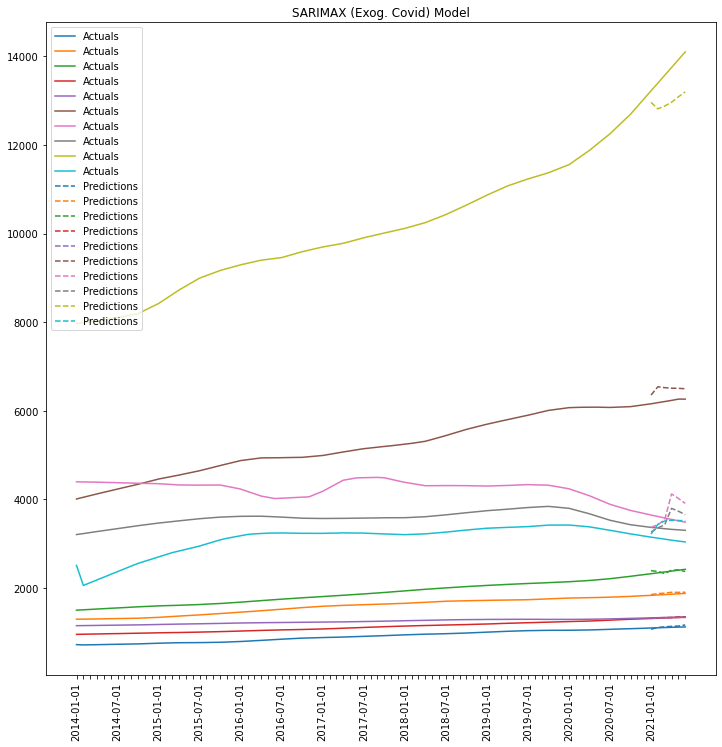

<Figure size 432x288 with 0 Axes>

In [523]:
plt.plot(full_y_act[['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']],label="Actuals")
plt.plot(y_pred[['77550', '10458', '98270', '55117', '60074','90272', '10069', '10280', '90265', '94121']],linestyle="--",label="Predictions")

plt.gcf().set_size_inches(12, 12)
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title("SARIMAX (Exog. Covid) Model")
plt.show()
plt.savefig('sarimax_graph.png')

In [525]:
mse_r2_sarimax=pd.DataFrame(columns=['zip','mse','r2'])


acutal_sarimax_zip[-6:]
pred_sarimax_zip

full_y_act
y_pred

acutal_sarimax_zip[-6:].columns
pred_sarimax_zip.columns

for zip_ in full_y_act[-6:].columns:
    mse_r2_sarimax=mse_r2_sarimax.append({'zip':zip_,'mse':mean_squared_error(full_y_act[-6:][zip_],y_pred[zip_]),\
                      'r2':r2_score(full_y_act[-6:][zip_],y_pred[zip_])},ignore_index=True)
mse_r2_sarimax['rmse']=np.sqrt(mse_r2_sarimax['mse'])
mse_r2_sarimax.sort_values('rmse',inplace=True)
mse_r2_sarimax
#pd.DataFrame(mse_r2_sarimax.mean(),columns=['Mean']).drop('zip',axis=0)

sarimax_zips = ['37138','45324','53212','85712','37066','94103','94107','94105','94301','90265']
full_y_act[['37138','45324','53212','85712','37066','94103','94107','94105','94301','90265']]


df66=pd.DataFrame(mse_r2_sarimax.mean(axis=0).drop(['zip','r2'],axis=0),columns=["Mean"])
df66.index.name='SARIMAX'
df66

,Mean
SARIMAX,
mse,10647.044082
rmse,69.557572


In [527]:
mse_r2_sarimax.index.name='SARIMAX'
mse_r2_sarimax

,zip,mse,r2,rmse
SARIMAX,,,,
701,37138,0.522023,0.998857,0.722511
734,45324,1.018461,0.989524,1.009188
774,53212,1.103078,0.937562,1.050275
1205,85712,1.512078,0.979263,1.229666
695,37066,2.620541,0.985129,1.618808
...,...,...,...,...
1476,94103,261716.111644,-63.486363,511.581970
1478,94107,297923.358116,-66.508267,545.823560
1477,94105,374529.392880,-81.225802,611.988066


In [530]:
df2000=mse_r2_sarimax[mse_r2_sarimax['zip'].isin(var_zips)].copy()
df2000.index.name='SARIMAX'
df2000.drop('r2',axis=1,inplace=True)
df2000

,zip,mse,rmse
SARIMAX,,,
783,55117,78.502002,8.860136
817,60074,88.444586,9.404498
995,77550,690.126743,26.270263
120,10458,1008.708920,31.760178
1623,98270,1632.229337,40.400858
1281,90272,76005.415821,275.690797
119,10280,90862.743778,301.434477
116,10069,146202.244232,382.364021
1485,94121,153290.993562,391.523937


In [445]:
mse_r2_var[mse_r2_var['zip'].isin(var_zips)].sort_values('rmse')

,zip,mse,r2,rmse
903,60074,4.910415,0.985333,2.215946
869,55117,6.752203,0.992970,2.598500
1726,98270,6.972473,0.999115,2.640544
121,10458,8.314598,0.992373,2.883504
332,23223,9.760742,0.969842,3.124219
1588,94121,415071.319614,-25.997045,644.260289
1382,90265,427717.908281,0.318683,654.001459
120,10280,523694.218037,-19.823708,723.667201
117,10069,543433.510874,-8.952774,737.179429
1384,90272,887285.070734,-194.803967,941.958105


In [442]:
mse_r2_sarima[mse_r2_sarima['zip'].isin(var_zips)].sort_values('rmse')

,zip,mse,r2,rmse
783,55117,78.639641,0.118403,8.867899
817,60074,106.101509,-1.031731,10.300559
120,10458,1008.285191,-3.491804,31.753507
1623,98270,1047.994701,0.088810,32.372746
1281,90272,82377.346462,-51.851163,287.014541
119,10280,102643.536976,-196.973069,320.380301
116,10069,116329.310661,-37.321897,341.070829
1485,94121,140261.674216,-100.628666,374.515252
1279,90265,457015.263433,-4.068318,676.029040


In [441]:
pd.DataFrame(mse_r2_sarimax.mean(),columns=['Mean']).drop('zip',axis=0)

,Mean
mse,10647.044082
r2,-420.385227
rmse,69.557572


In [325]:
y_pred[highest_zip]
y_act[highest_zip]

,94103,94040,94107,94301,94105,94109,94115,94086,94121,94110
84,2821.0,3108.0,3287.0,4434.0,3783.0,2556.0,2969.0,2812.0,3142.0,3356.0
85,2782.0,3073.0,3247.0,4392.0,3738.0,2525.0,2938.0,2791.0,3120.0,3329.0
86,2743.0,3038.0,3206.0,4354.0,3699.0,2495.0,2907.0,2770.0,3097.0,3301.0
87,2704.0,3003.0,3166.0,4316.0,3659.0,2465.0,2877.0,2749.0,3074.0,3274.0
88,2670.0,2971.0,3130.0,4278.0,3619.0,2436.0,2848.0,2730.0,3054.0,3250.0
89,2635.0,2939.0,3093.0,4242.0,3586.0,2408.0,2820.0,2710.0,3034.0,3225.0
